intro: What makes a strong password and why should the IT/infrastructure leaders analyze yearly leaked password datasets
- Question: What is the leaked password trend for 2020? 
    - average, max, min length of leaked string
    - average, max, min time to crack in seconds
    - correlation between length of string and time to crack?
    - were there any passwords that meets strong req leaked (special char, upper, lower, num, len >12)?
    - what is more important, length, or mix of characters
    - Of the passwords on the data set, did it take longer to crack in the previous years or did the time to crack stay the same?
- Future: Companies should continue to analyze the password trends yearly to see if password reqs should be updated
    - Is there a change in average length of password by years? => if yes increase the min password length

<p><a name="sections"></a></p>


# Sections

- <a href="#SettingUp">Setting up + basic df info</a>
    - <a href="#AddingPws">Adding Password_Length Column</a>
- <a href="#Compcountry">Comparing by countries</a>
    - <a href="#countryusrcount">How many users in each country were found to have used passwords on the list</a>
    - <a href="#countrylengthvsttcis">What is the average password length by country?</a>
    - <a href="#countryavgttcis">What is the average time to crack the password by country?</a>
    - <a href="#countrysharetoppass">Do different countries share same top used passwords (Top 3)</a>
- <a href="#uniqpwd">Analysis of unique passwords</a>
    - <a href="#uniqdissect">Dissecting unique passwords by character type</a>
- <a href="#pwdcomplex">Analysis by Password Complexity</a>
    - <a href="#strongpwdele">Comparing the elements that make a strong password using boxplot</a>
    - <a href="#onecomplextype">Of the unique passwords, what percentage has only one complexity type</a>
    - <a href="#TTCISbyyear">Of the unique passwords in the list, has the crack time changed from the past years? [do passwords get easier to crack over time?]</a>

<p><a name="SettingUp"></a></p>

# ------- Setting up + basic df info -------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.axis import Axis
import math
plt.style.use('ggplot')

In [2]:
pw = pd.read_csv('pw_updated.csv')
pw

,Unnamed: 0,country_code,country,Rank,Password,User_count,Global_rank,time,Time_to_crack_in_seconds
0,0,au,Australia,1,123456,308483,1.0,0.19 MILLISECONDS,0.0
1,1,at,Austria,1,123456,100939,1.0,0.19 MILLISECONDS,0.0
2,2,be,Belgium,1,123456,78777,1.0,0.19 MILLISECONDS,0.0
3,3,br,Brazil,1,123456,1003925,1.0,0.19 MILLISECONDS,0.0
4,4,ca,Canada,1,123456,570178,1.0,0.19 MILLISECONDS,0.0
...,...,...,...,...,...,...,...,...,...
9795,9795,vn,Vietnam,196,hongngoc,2660,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0
9796,9796,vn,Vietnam,197,anhtien,2628,NaN,7 MINUTES 51 SECONDS 28 JIFFIES 1.29 MILLISECONDS,471.0
9797,9797,vn,Vietnam,198,lanhuong,2620,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0
9798,9798,vn,Vietnam,199,congacon,2584,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0


In [3]:
# removing the Unnamed: 0 column
pw = pw.drop(columns=["Unnamed: 0"])

In [4]:
pw

,country_code,country,Rank,Password,User_count,Global_rank,time,Time_to_crack_in_seconds
0,au,Australia,1,123456,308483,1.0,0.19 MILLISECONDS,0.0
1,at,Austria,1,123456,100939,1.0,0.19 MILLISECONDS,0.0
2,be,Belgium,1,123456,78777,1.0,0.19 MILLISECONDS,0.0
3,br,Brazil,1,123456,1003925,1.0,0.19 MILLISECONDS,0.0
4,ca,Canada,1,123456,570178,1.0,0.19 MILLISECONDS,0.0
...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0
9796,vn,Vietnam,197,anhtien,2628,NaN,7 MINUTES 51 SECONDS 28 JIFFIES 1.29 MILLISECONDS,471.0
9797,vn,Vietnam,198,lanhuong,2620,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0
9798,vn,Vietnam,199,congacon,2584,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0


In [5]:
# to see all the countries in the dataset
pw.country.unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'China', 'Colombia', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'India',
       'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea',
       'Latvia', 'Lithuania', 'Malaysia', 'Mexico', 'Netherlands',
       'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland',
       'Portugal', 'Romania', 'Russia', 'Saudi Arabia', 'Slovak Republic',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand',
       'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Vietnam'], dtype=object)

***Adding Password_Length Column***

In [6]:
#create a new column for password length
pw["Password_Length"] = pw["Password"].apply(len)

In [7]:
pw

,country_code,country,Rank,Password,User_count,Global_rank,time,Time_to_crack_in_seconds,Password_Length
0,au,Australia,1,123456,308483,1.0,0.19 MILLISECONDS,0.0,6
1,at,Austria,1,123456,100939,1.0,0.19 MILLISECONDS,0.0,6
2,be,Belgium,1,123456,78777,1.0,0.19 MILLISECONDS,0.0,6
3,br,Brazil,1,123456,1003925,1.0,0.19 MILLISECONDS,0.0,6
4,ca,Canada,1,123456,570178,1.0,0.19 MILLISECONDS,0.0,6
...,...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8
9796,vn,Vietnam,197,anhtien,2628,NaN,7 MINUTES 51 SECONDS 28 JIFFIES 1.29 MILLISECONDS,471.0,7
9797,vn,Vietnam,198,lanhuong,2620,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8
9798,vn,Vietnam,199,congacon,2584,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8


**Creating "Continent" column**

In [8]:
africa = ['Nigeria', 'South Africa']
asia = ['China', 'India', 'Indonesia', 'Israel', 'Japan', 'Korea', 'Malaysia','Philippines', 'Saudi Arabia', 'Thailand', 'Turkey', 'United Arab Emirates', 'Vietnam']
europe = ['Austria', 'Belgium','Czech Republic', 'Denmark', 'Estonia', 'Finland','France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom']
nc_Amer = ['Canada', 'Mexico', 'United States']
ocean_Aus = ['Australia', 'New Zealand'] 
s_Amer = ['Brazil', 'Chile', 'Colombia']

all_cont={"Africa":{'Nigeria', 'South Africa'}, "Asia":{'China', 'India', 'Indonesia', 'Israel', 'Japan', 'Korea', 'Malaysia','Philippines', 'Saudi Arabia', 'Thailand', 'Turkey', 'United Arab Emirates', 'Vietnam'}, "Europe": {'Austria', 'Belgium','Czech Republic', 'Denmark', 'Estonia', 'Finland','France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'}, "NC_Amer":{'Canada', 'Mexico', 'United States'}, "Ocean_Aus" : {'Australia', 'New Zealand'}, "S_Amer" : {'Brazil', 'Chile', 'Colombia'}}

In [9]:
#Create a new column Look at "country" column and find the corresponding continent
def find_Contin(country):
    if country in africa:
        return "Africa"
    elif country in asia:
        return "Asia"
    elif country in europe:
        return "Europe"
    elif country in nc_Amer:
        return "NC America"
    elif country in ocean_Aus:
        return "Oceania Australia"
    else:
        return "other"

pw["Continent"] = pw["country"].apply(lambda x: find_Contin(x))

In [10]:
pw

,country_code,country,Rank,Password,User_count,Global_rank,time,Time_to_crack_in_seconds,Password_Length,Continent
0,au,Australia,1,123456,308483,1.0,0.19 MILLISECONDS,0.0,6,Oceania Australia
1,at,Austria,1,123456,100939,1.0,0.19 MILLISECONDS,0.0,6,Europe
2,be,Belgium,1,123456,78777,1.0,0.19 MILLISECONDS,0.0,6,Europe
3,br,Brazil,1,123456,1003925,1.0,0.19 MILLISECONDS,0.0,6,other
4,ca,Canada,1,123456,570178,1.0,0.19 MILLISECONDS,0.0,6,NC America
...,...,...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia
9796,vn,Vietnam,197,anhtien,2628,NaN,7 MINUTES 51 SECONDS 28 JIFFIES 1.29 MILLISECONDS,471.0,7,Asia
9797,vn,Vietnam,198,lanhuong,2620,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia
9798,vn,Vietnam,199,congacon,2584,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia


<p><a name="Compcountry"></a></p>

# -------- Comparing by countries --------

<p><a name="countryusrcount"></a></p>

## How many users in each country were found to have used passwords on the list

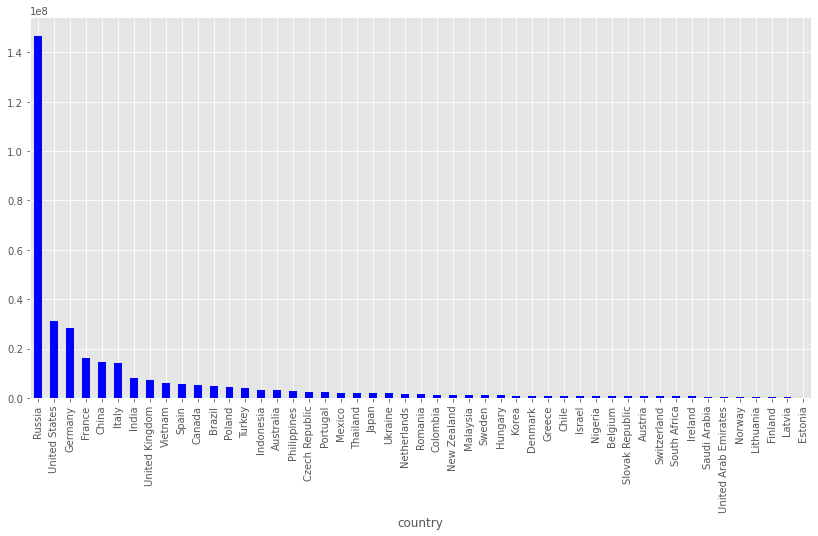

In [11]:
# Sum of User count by country
plt.figure(figsize = (14,7))
sum_Usr_cnt_ctry = pw.groupby("country")["User_count"].sum().sort_values(ascending=False).plot.bar(color = 'b')
sum_Usr_cnt_ctry.ylabel = ("User Count")

In [12]:
#list view of the sum of User count by country
sum_Usr_cnt_ctry = pw.groupby("country")["User_count"].sum().sort_values(ascending=False)
sum_Usr_cnt_ctry

country
Russia                  146837497
United States            31229262
Germany                  28364318
France                   16160255
China                    14739683
Italy                    14030845
India                     8186249
United Kingdom            7440559
Vietnam                   6026634
Spain                     5493452
Canada                    5277926
Brazil                    4943358
Poland                    4412538
Turkey                    3944162
Indonesia                 3223828
Australia                 3083341
Philippines               2750631
Czech Republic            2288530
Portugal                  2282038
Mexico                    2162221
Thailand                  2055344
Japan                     1906700
Ukraine                   1829898
Netherlands               1636625
Romania                   1509270
Colombia                  1379631
New Zealand               1367054
Malaysia                  1359725
Sweden                    1194218
Hungar

In [13]:
pw["User_count"].mean()

34685.94418367347

<p><a name="countrylengthvsttcis"></a></p>

## What is the average password length by country?

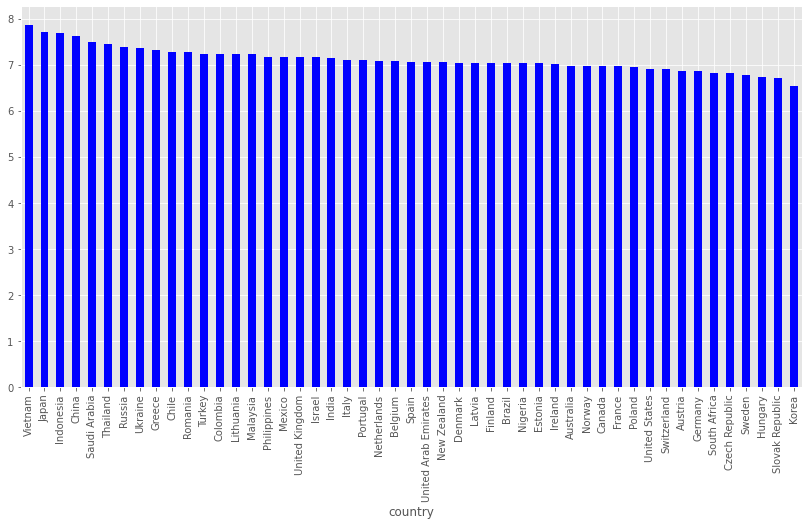

In [14]:
#WITHOUT LOG: Plot by mean password length of each country
plt.figure(figsize = (14,7))
mean_pwd_len_ctry = pw.groupby("country")["Password_Length"].mean().sort_values(ascending=False).plot.bar(color = 'b')
mean_pwd_len_ctry.ylabel = ("Password Length")

In [15]:
pw["Password_Length"].mean()

7.116224489795918

In [16]:
pw.groupby("country")["Password_Length"].mean().sort_values(ascending=False)

country
Vietnam                 7.870
Japan                   7.710
Indonesia               7.685
China                   7.620
Saudi Arabia            7.480
Thailand                7.455
Russia                  7.390
Ukraine                 7.350
Greece                  7.325
Chile                   7.280
Romania                 7.270
Turkey                  7.240
Colombia                7.235
Lithuania               7.225
Malaysia                7.220
Philippines             7.175
Mexico                  7.170
United Kingdom          7.165
Israel                  7.155
India                   7.150
Italy                   7.100
Portugal                7.095
Netherlands             7.085
Belgium                 7.085
Spain                   7.065
United Arab Emirates    7.060
New Zealand             7.050
Denmark                 7.045
Latvia                  7.040
Finland                 7.040
Brazil                  7.040
Nigeria                 7.035
Estonia                 7.025
Ir

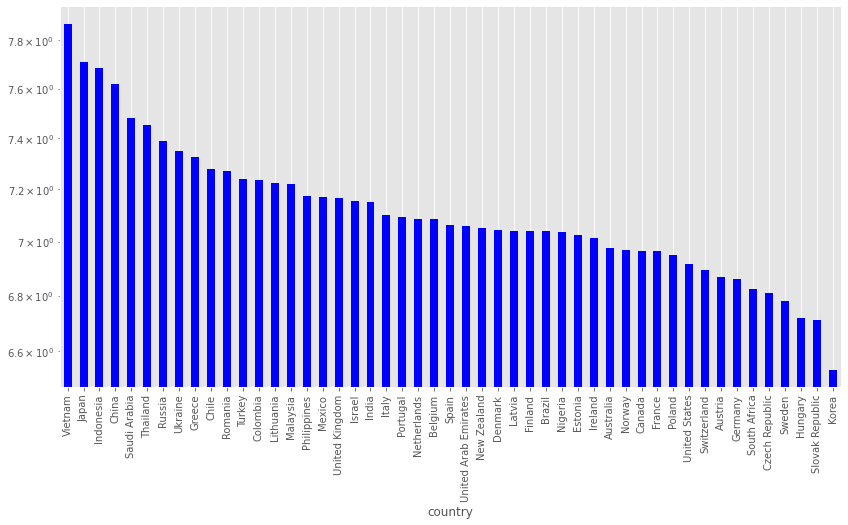

In [17]:
#WITH LOG: Plot by mean password length of each country
plt.figure(figsize = (14,7))
mean_pwd_len_ctry = pw.groupby("country")["Password_Length"].mean().sort_values(ascending=False).plot.bar(color = 'b')
mean_pwd_len_ctry.ylabel = ("Password Length")
plt.yscale("log")

In [18]:
# mean password length of all countries
pw["Password_Length"].mean()

7.116224489795918

In [19]:
#mean password length of just US
pw[pw["country_code"] == "us"]["Password_Length"].mean()

6.915

<p><a name="countryavgttcis"></a></p>

# What is the average time to crack the password by country?

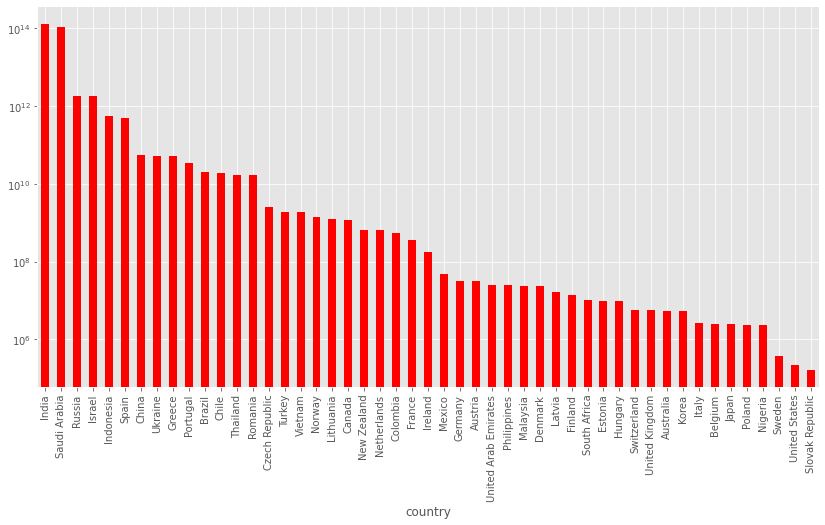

In [20]:
#WITH LOG: mean time to crack by country
plt.figure(figsize = (14,7))
pw.groupby("country")["Time_to_crack_in_seconds"].mean().sort_values(ascending=False).plot.bar(color = 'r')

plt.yscale("log")

In [21]:
pw["Time_to_crack_in_seconds"].mean()

5003708088591.471

In [22]:
pw.groupby("country")["Time_to_crack_in_seconds"].mean().sort_values(ascending=False)

country
India                   1.323209e+14
Saudi Arabia            1.078778e+14
Russia                  1.854237e+12
Israel                  1.804185e+12
Indonesia               5.519333e+11
Spain                   4.958580e+11
China                   5.491747e+10
Ukraine                 5.132037e+10
Greece                  5.068390e+10
Portugal                3.477680e+10
Brazil                  2.006132e+10
Chile                   1.882178e+10
Thailand                1.663074e+10
Romania                 1.659748e+10
Czech Republic          2.556694e+09
Turkey                  1.935750e+09
Vietnam                 1.916976e+09
Norway                  1.436955e+09
Lithuania               1.267573e+09
Canada                  1.155832e+09
New Zealand             6.569626e+08
Netherlands             6.519802e+08
Colombia                5.342243e+08
France                  3.501219e+08
Ireland                 1.718852e+08
Mexico                  4.711552e+07
Germany                 3.2507

<AxesSubplot:xlabel='country'>

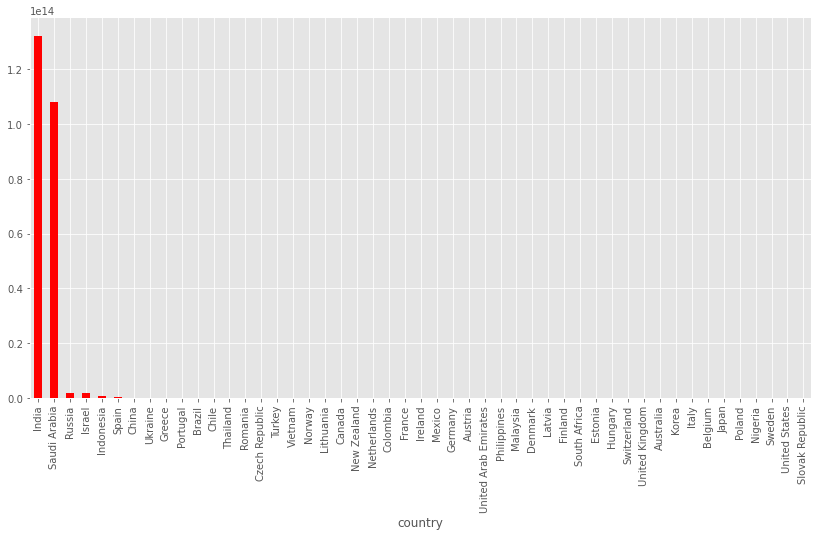

In [23]:
#WITHOUT LOG: mean time to crack by country
#Will not be using this, as it's difficult to see what's happening here due to most of the time to crack being 0 or close to 0
plt.figure(figsize = (14,7))
pw.groupby("country")["Time_to_crack_in_seconds"].mean().sort_values(ascending=False).plot.bar(color = 'r')

In [24]:
#mean time to crack in seconds of all countries in 2020
pw["Time_to_crack_in_seconds"].mean()

5003708088591.471

In [25]:
#mean time to crack in seconds of each countries in 2020
country_avg_TTCIS = pw.groupby("country")["Time_to_crack_in_seconds"].mean()
country_avg_TTCIS

country
Australia               5.487681e+06
Austria                 3.182829e+07
Belgium                 2.540244e+06
Brazil                  2.006132e+10
Canada                  1.155832e+09
Chile                   1.882178e+10
China                   5.491747e+10
Colombia                5.342243e+08
Czech Republic          2.556694e+09
Denmark                 2.282684e+07
Estonia                 9.573987e+06
Finland                 1.385202e+07
France                  3.501219e+08
Germany                 3.250793e+07
Greece                  5.068390e+10
Hungary                 9.398979e+06
India                   1.323209e+14
Indonesia               5.519333e+11
Ireland                 1.718852e+08
Israel                  1.804185e+12
Italy                   2.604271e+06
Japan                   2.433581e+06
Korea                   5.311745e+06
Latvia                  1.660102e+07
Lithuania               1.267573e+09
Malaysia                2.416827e+07
Mexico                  4.7115

<p><a name="countrysharetoppass"></a></p>

## Do different countries share same top used passwords (Top 3)

In [26]:
pw

,country_code,country,Rank,Password,User_count,Global_rank,time,Time_to_crack_in_seconds,Password_Length,Continent
0,au,Australia,1,123456,308483,1.0,0.19 MILLISECONDS,0.0,6,Oceania Australia
1,at,Austria,1,123456,100939,1.0,0.19 MILLISECONDS,0.0,6,Europe
2,be,Belgium,1,123456,78777,1.0,0.19 MILLISECONDS,0.0,6,Europe
3,br,Brazil,1,123456,1003925,1.0,0.19 MILLISECONDS,0.0,6,other
4,ca,Canada,1,123456,570178,1.0,0.19 MILLISECONDS,0.0,6,NC America
...,...,...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia
9796,vn,Vietnam,197,anhtien,2628,NaN,7 MINUTES 51 SECONDS 28 JIFFIES 1.29 MILLISECONDS,471.0,7,Asia
9797,vn,Vietnam,198,lanhuong,2620,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia
9798,vn,Vietnam,199,congacon,2584,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia


In [27]:
df1 = pw.groupby(["country"])
df2 = df1.apply(lambda x: x.sort_values(["User_count"]))
df3 = df2.reset_index(drop=True)
df4 = df3.groupby("country").head(3)
df4.sort_values("User_count", ascending = False)

,country_code,country,Rank,Password,User_count,Global_rank,time,Time_to_crack_in_seconds,Password_Length,Continent
9402,us,United States,198,muffin,51384,NaN,0.19 MILLISECONDS,0.0,6,NC America
9401,us,United States,199,dancer,51238,NaN,0.19 MILLISECONDS,0.0,6,NC America
9400,us,United States,200,madison1,50989,NaN,1 DAYS 21 HOURS 58 MINUTES 54 SECONDS 83 JIFFI...,165534.0,8,NC America
2602,de,Germany,198,stratus,27504,NaN,1 JIFFIES 8 MILLISECONDS,0.0,7,Europe
2601,de,Germany,199,dianne,27498,NaN,0.19 MILLISECONDS,0.0,6,Europe
...,...,...,...,...,...,...,...,...,...,...
2001,ee,Estonia,199,potter,150,NaN,1 JIFFIES 8 MILLISECONDS,0.0,6,Europe
2000,ee,Estonia,200,great1,147,NaN,2 MINUTES 8 SECONDS 73 JIFFIES 7 MILLISECONDS,128.0,6,Europe
7201,sa,Saudi Arabia,198,147852369,127,182.0,2 MONTHS 1 WEEKS 1 DAYS 23 HOURS 20 MINUTES 18...,5430018.0,9,Asia
7202,sa,Saudi Arabia,199,kashif,127,NaN,18 SECONDS 13 JIFFIES 6 MILLISECONDS,18.0,6,Asia


In [28]:
len(df4["Password"].unique())

140

In [29]:
pw

,country_code,country,Rank,Password,User_count,Global_rank,time,Time_to_crack_in_seconds,Password_Length,Continent
0,au,Australia,1,123456,308483,1.0,0.19 MILLISECONDS,0.0,6,Oceania Australia
1,at,Austria,1,123456,100939,1.0,0.19 MILLISECONDS,0.0,6,Europe
2,be,Belgium,1,123456,78777,1.0,0.19 MILLISECONDS,0.0,6,Europe
3,br,Brazil,1,123456,1003925,1.0,0.19 MILLISECONDS,0.0,6,other
4,ca,Canada,1,123456,570178,1.0,0.19 MILLISECONDS,0.0,6,NC America
...,...,...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia
9796,vn,Vietnam,197,anhtien,2628,NaN,7 MINUTES 51 SECONDS 28 JIFFIES 1.29 MILLISECONDS,471.0,7,Asia
9797,vn,Vietnam,198,lanhuong,2620,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia
9798,vn,Vietnam,199,congacon,2584,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia


In [30]:
pw.groupby(["country", "Password"])["User_count"].max(3).sort_values(ascending = False)

country       Password 
Russia        123456       19000630
              qwerty       15738011
              123456789    14975791
              12345         9139679
China         123456        8159358
                             ...   
Saudi Arabia  kashmir           132
              asdzxc            132
              147852369         127
              kashif            127
              hadeel            126
Name: User_count, Length: 9799, dtype: int64

In [31]:
pw.groupby(["country", "Password"])["User_count"].head(3)


0        308483
1        100939
2         78777
3       1003925
4        570178
         ...   
9795       2660
9796       2628
9797       2620
9798       2584
9799       2532
Name: User_count, Length: 9800, dtype: int64

Since there are some of the same passwords on list, analyze by unique passwords

<p><a name="uniqpwd"></a></p>


# -------- Analysis of unique passwords --------

**Finding unique passwords from list**

In [32]:
#dropping duplicates passwords from the list
pw.drop_duplicates(subset= ["Password"], keep = 'first', inplace = True)
pw

,country_code,country,Rank,Password,User_count,Global_rank,time,Time_to_crack_in_seconds,Password_Length,Continent
0,au,Australia,1,123456,308483,1.0,0.19 MILLISECONDS,0.0,6,Oceania Australia
49,au,Australia,2,password,191880,5.0,0.19 MILLISECONDS,0.0,8,Oceania Australia
98,au,Australia,3,lizottes,98220,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Oceania Australia
99,au,Australia,4,password1,86884,16.0,0.19 MILLISECONDS,0.0,9,Oceania Australia
138,au,Australia,5,123456789,75856,2.0,0.19 MILLISECONDS,0.0,9,Oceania Australia
...,...,...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia
9796,vn,Vietnam,197,anhtien,2628,NaN,7 MINUTES 51 SECONDS 28 JIFFIES 1.29 MILLISECONDS,471.0,7,Asia
9797,vn,Vietnam,198,lanhuong,2620,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia
9798,vn,Vietnam,199,congacon,2584,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia


In [33]:
pw["Password_Length"].mean()

7.2307873090481785

In [34]:
pw.groupby("Password")["User_count"].max()

Password
000000       13783
100100         482
100200300     9367
10101        12711
101010       38013
             ...  
zxczxc       12550
zxzxzx       10102
zyolpoon      3308
йцукен        1257
пароль        1096
Name: User_count, Length: 4255, dtype: int64

<p><a name="uniqdissect"></a></p>

## Dissecting unique passwords by character type

**Create bool columns based on if they meet password criteria. Only focusing on unique passwords**

In [35]:
special_char = "!@#$%^&*()-+?_=,<>/"
numbers = "1234567890"
upper = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
lower = "abcdefghijklmnopqrstuvwxyz"


def hasUpper(x):
    for i in range(len(x)):
        if x[i] in upper:
            return True
            break
        if i != len(x)-1:
            i+=1
        else:
            return False


def hasLower(x):
    for i in range(len(x)):
        if x[i] in lower:
            return True
            break
        if i != len(x)-1:
            i+=1
        else:
            return False


def hasNum(x):
    for i in range(len(x)):
        if x[i] in numbers:
            return True
            break
        if i != len(x)-1:
            i+=1
        else:
            return False


def hasSpec(x):
    for i in range(len(x)):
        if x[i] in special_char:
            return True
            break
        if i != len(x)-1:
            i+=1
        else:
            return False


def Len_Over_12(Password_Length):
    if Password_Length > 12:
        return True
        if i != len(Password_Length):
            i+=1
    else:
        return False



pw["Has_Upper"] = pw["Password"].apply(lambda x: hasUpper(x))
pw["Has_Lower"] = pw["Password"].apply(lambda x: hasLower(x))
pw["Has_Num"] = pw["Password"].apply(lambda x: hasNum(x))
pw["Has_Special_Char"] = pw["Password"].apply(lambda x: hasSpec(x))
pw["Has_len_Over12"] = pw["Password_Length"].apply(lambda x: Len_Over_12(x))

In [36]:
pw

,country_code,country,Rank,Password,User_count,Global_rank,time,Time_to_crack_in_seconds,Password_Length,Continent,Has_Upper,Has_Lower,Has_Num,Has_Special_Char,Has_len_Over12
0,au,Australia,1,123456,308483,1.0,0.19 MILLISECONDS,0.0,6,Oceania Australia,False,False,True,False,False
49,au,Australia,2,password,191880,5.0,0.19 MILLISECONDS,0.0,8,Oceania Australia,False,True,False,False,False
98,au,Australia,3,lizottes,98220,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Oceania Australia,False,True,False,False,False
99,au,Australia,4,password1,86884,16.0,0.19 MILLISECONDS,0.0,9,Oceania Australia,False,True,True,False,False
138,au,Australia,5,123456789,75856,2.0,0.19 MILLISECONDS,0.0,9,Oceania Australia,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia,False,True,False,False,False
9796,vn,Vietnam,197,anhtien,2628,NaN,7 MINUTES 51 SECONDS 28 JIFFIES 1.29 MILLISECONDS,471.0,7,Asia,False,True,False,False,False
9797,vn,Vietnam,198,lanhuong,2620,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia,False,True,False,False,False
9798,vn,Vietnam,199,congacon,2584,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia,False,True,False,False,False


**Adding Password complexity column that counts True by row**

In [37]:
pw["Password_Complexity"] = pw.Has_Upper.astype(int) + pw.Has_Lower.astype(int) + pw.Has_Num.astype(int) + pw.Has_Special_Char.astype(int) + pw.Has_len_Over12.astype(int)

In [38]:
pw

,country_code,country,Rank,Password,User_count,Global_rank,time,Time_to_crack_in_seconds,Password_Length,Continent,Has_Upper,Has_Lower,Has_Num,Has_Special_Char,Has_len_Over12,Password_Complexity
0,au,Australia,1,123456,308483,1.0,0.19 MILLISECONDS,0.0,6,Oceania Australia,False,False,True,False,False,1
49,au,Australia,2,password,191880,5.0,0.19 MILLISECONDS,0.0,8,Oceania Australia,False,True,False,False,False,1
98,au,Australia,3,lizottes,98220,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Oceania Australia,False,True,False,False,False,1
99,au,Australia,4,password1,86884,16.0,0.19 MILLISECONDS,0.0,9,Oceania Australia,False,True,True,False,False,2
138,au,Australia,5,123456789,75856,2.0,0.19 MILLISECONDS,0.0,9,Oceania Australia,False,False,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia,False,True,False,False,False,1
9796,vn,Vietnam,197,anhtien,2628,NaN,7 MINUTES 51 SECONDS 28 JIFFIES 1.29 MILLISECONDS,471.0,7,Asia,False,True,False,False,False,1
9797,vn,Vietnam,198,lanhuong,2620,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia,False,True,False,False,False,1
9798,vn,Vietnam,199,congacon,2584,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia,False,True,False,False,False,1


In [39]:
#Overall password complexity mean of all countries
pw["Password_Complexity"].mean()

1.1701527614571092

In [40]:
#Password complexity mean of each countries
country_avg_complex = pw.groupby("country")["Password_Complexity"].mean()
country_avg_complex

country
Australia               1.235000
Austria                 1.097902
Belgium                 1.085271
Brazil                  1.131944
Canada                  1.319149
Chile                   1.151786
China                   1.407186
Colombia                1.400000
Czech Republic          1.088235
Denmark                 1.103448
Estonia                 1.130769
Finland                 1.335878
France                  1.057143
Germany                 1.166667
Greece                  1.146667
Hungary                 1.064000
India                   1.237762
Indonesia               1.206349
Ireland                 1.238095
Israel                  1.410714
Italy                   1.008547
Japan                   1.017544
Korea                   1.426471
Latvia                  1.109091
Lithuania               1.101449
Malaysia                1.468085
Mexico                  1.122449
Netherlands             1.186667
New Zealand             1.121212
Nigeria                 1.007752
No

**Find the number of passwords based on password type + their statistical details**

---------- ******** ----------<br>
Upper Case Passwords<br>
---------- ******** ----------

In [41]:
#Only all upper case passwords
onlyUpPwd = pw.loc[(pw.Has_Upper == True) & (pw.Has_Lower == False) & (pw.Has_Num ==False) & (pw.Has_Special_Char ==False) & (pw.Has_len_Over12 == False)]
onlyUpPwd

,country_code,country,Rank,Password,User_count,Global_rank,time,Time_to_crack_in_seconds,Password_Length,Continent,Has_Upper,Has_Lower,Has_Num,Has_Special_Char,Has_len_Over12,Password_Complexity
3956,be,Belgium,172,SKIFFY,1423,NaN,19 MINUTES 20 SECONDS 8 JIFFIES 7 MILLISECONDS,1.160000e+03,6,Europe,True,False,False,False,False,1
6301,de,Germany,43,DIOSESFIEL,125482,NaN,2 CENTURIES 6 DECADES 8 YEARS 9 MONTHS 2 WEEKS...,2.169834e+09,10,Europe,True,False,False,False,False,1
7317,ie,Ireland,181,EXPIRED,1063,NaN,16 HOURS 45 MINUTES 24 SECONDS 1 JIFFIES 6 MIL...,6.032400e+04,7,Europe,True,False,False,False,False,1


In [42]:
len_onlyUpPwd = len(onlyUpPwd)
len_onlyUpPwd

3

In [43]:
onlyUpPwd.describe()

,Rank,User_count,Global_rank,Time_to_crack_in_seconds,Password_Length,Password_Complexity
count,3.000000,3.000000,0.0,3.000000e+00,3.000000,3.0
mean,132.000000,42656.000000,NaN,7.232984e+08,7.666667,1.0
std,77.207513,71729.645942,NaN,1.252736e+09,2.081666,0.0
min,43.000000,1063.000000,NaN,1.160000e+03,6.000000,1.0
25%,107.500000,1243.000000,NaN,3.074200e+04,6.500000,1.0
50%,172.000000,1423.000000,NaN,6.032400e+04,7.000000,1.0
75%,176.500000,63452.500000,NaN,1.084947e+09,8.500000,1.0
max,181.000000,125482.000000,NaN,2.169834e+09,10.000000,1.0


---------- ******** ----------<br>
Lower Case Passwords<br>
---------- ******** ----------

In [44]:
#Only all lower case passwords
onlyLowPwd = pw.loc[(pw.Has_Upper == False) & (pw.Has_Lower == True) & (pw.Has_Num ==False) & (pw.Has_Special_Char ==False) & (pw.Has_len_Over12 == False)]
onlyLowPwd

,country_code,country,Rank,Password,User_count,Global_rank,time,Time_to_crack_in_seconds,Password_Length,Continent,Has_Upper,Has_Lower,Has_Num,Has_Special_Char,Has_len_Over12,Password_Complexity
49,au,Australia,2,password,191880,5.0,0.19 MILLISECONDS,0.0,8,Oceania Australia,False,True,False,False,False,1
98,au,Australia,3,lizottes,98220,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Oceania Australia,False,True,False,False,False,1
277,au,Australia,8,qwerty,67130,4.0,0.19 MILLISECONDS,0.0,6,Oceania Australia,False,True,False,False,False,1
374,au,Australia,10,holden,30844,NaN,1 JIFFIES 8 MILLISECONDS,0.0,6,Oceania Australia,False,True,False,False,False,1
376,au,Australia,11,charlie,30527,96.0,0.19 MILLISECONDS,0.0,7,Oceania Australia,False,True,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia,False,True,False,False,False,1
9796,vn,Vietnam,197,anhtien,2628,NaN,7 MINUTES 51 SECONDS 28 JIFFIES 1.29 MILLISECONDS,471.0,7,Asia,False,True,False,False,False,1
9797,vn,Vietnam,198,lanhuong,2620,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia,False,True,False,False,False,1
9798,vn,Vietnam,199,congacon,2584,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia,False,True,False,False,False,1


In [45]:
len_onlyLowPwd= len(onlyLowPwd)
len_onlyLowPwd

3360

In [46]:
onlyLowPwd.describe()

,Rank,User_count,Global_rank,Time_to_crack_in_seconds,Password_Length,Password_Complexity
count,3360.000000,3360.000000,74.000000,3.360000e+03,3360.000000,3360.0
mean,111.638988,12255.965179,107.013514,1.565599e+07,7.048512,1.0
std,54.671487,32536.443584,48.910736,1.795425e+08,1.375269,0.0
min,2.000000,126.000000,4.000000,0.000000e+00,3.000000,1.0
25%,66.000000,1652.750000,70.250000,1.000000e+00,6.000000,1.0
50%,115.000000,3607.000000,107.500000,1.800000e+01,7.000000,1.0
75%,160.000000,9186.500000,145.000000,1.225300e+04,8.000000,1.0
max,200.000000,699420.000000,200.000000,2.443417e+09,12.000000,1.0


---------- ******** ----------<br>
Number Passwords<br>
---------- ******** ----------

In [47]:
#paswords that are soley numbers
onlyNumPwd = pw.loc[(pw.Has_Upper == False) & (pw.Has_Lower == False) & (pw.Has_Num ==True) & (pw.Has_Special_Char ==False) & (pw.Has_len_Over12 == False)]
onlyNumPwd

,country_code,country,Rank,Password,User_count,Global_rank,time,Time_to_crack_in_seconds,Password_Length,Continent,Has_Upper,Has_Lower,Has_Num,Has_Special_Char,Has_len_Over12,Password_Complexity
0,au,Australia,1,123456,308483,1.0,0.19 MILLISECONDS,0.0,6,Oceania Australia,False,False,True,False,False,1
138,au,Australia,5,123456789,75856,2.0,0.19 MILLISECONDS,0.0,9,Oceania Australia,False,False,True,False,False,1
187,au,Australia,6,12345,69344,3.0,0.19 MILLISECONDS,0.0,5,Oceania Australia,False,False,True,False,False,1
325,au,Australia,9,12345678,37675,6.0,0.19 MILLISECONDS,0.0,8,Oceania Australia,False,False,True,False,False,1
392,au,Australia,12,1234567,28059,10.0,0.19 MILLISECONDS,0.0,7,Oceania Australia,False,False,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9353,th,Thailand,189,135792468,665,NaN,2 MONTHS 1 WEEKS 1 DAYS 23 HOURS 20 MINUTES 18...,5430018.0,9,Asia,False,False,True,False,False,1
9524,ae,United Arab Emirates,65,1111111111,1197,114.0,6 YEARS 9 MONTHS 3 WEEKS 13 HOURS 19 MINUTES 5...,213061795.0,10,Asia,False,False,True,False,False,1
9531,ae,United Arab Emirates,171,93626597,438,NaN,1 DAYS 21 HOURS 58 MINUTES 54 SECONDS 83 JIFFI...,165534.0,8,Asia,False,False,True,False,False,1
9534,ae,United Arab Emirates,187,445566,368,NaN,2 MINUTES 8 SECONDS 73 JIFFIES 7 MILLISECONDS,128.0,6,Asia,False,False,True,False,False,1


In [48]:
len_onlyNumPwd = len(onlyNumPwd)
len_onlyNumPwd

222

In [49]:
onlyNumPwd.describe()

,Rank,User_count,Global_rank,Time_to_crack_in_seconds,Password_Length,Password_Complexity
count,222.000000,222.00000,62.000000,2.220000e+02,222.000000,222.0
mean,118.076577,12737.72973,86.435484,4.572306e+09,6.855856,1.0
std,55.457280,29202.69100,64.937958,3.369931e+10,1.700928,0.0
min,1.000000,222.00000,1.000000,0.000000e+00,3.000000,1.0
25%,73.250000,1265.75000,31.000000,1.280000e+02,6.000000,1.0
50%,123.500000,9050.00000,67.000000,1.280000e+02,6.000000,1.0
75%,165.750000,11521.50000,149.500000,1.655340e+05,8.000000,1.0
max,200.000000,308483.00000,198.000000,2.527923e+11,12.000000,1.0


---------- ******** ----------<br>
Special Char Passwords<br>
---------- ******** ----------

In [50]:
#passwords that are soley special chacters
onlySpePwd = pw.loc[(pw.Has_Upper == False) & (pw.Has_Lower == False) & (pw.Has_Num ==False) & (pw.Has_Special_Char ==True) & (pw.Has_len_Over12 == False)]
onlySpePwd

,country_code,country,Rank,Password,User_count,Global_rank,time,Time_to_crack_in_seconds,Password_Length,Continent,Has_Upper,Has_Lower,Has_Num,Has_Special_Char,Has_len_Over12,Password_Complexity


In [51]:
len_onlySpePwd= len(onlySpePwd)
len_onlySpePwd

0

---------- ******** ----------<br>
Other Language Passwords<br>
---------- ******** ----------

In [52]:
#Other language password
otherPwd = pw.loc[(pw.Has_Upper == False) & (pw.Has_Lower == False) & (pw.Has_Num ==False) & (pw.Has_Special_Char ==False) & (pw.Has_len_Over12 == False)]
otherPwd

,country_code,country,Rank,Password,User_count,Global_rank,time,Time_to_crack_in_seconds,Password_Length,Continent,Has_Upper,Has_Lower,Has_Num,Has_Special_Char,Has_len_Over12,Password_Complexity
9497,ua,Ukraine,147,йцукен,1257,NaN,18 SECONDS 13 JIFFIES 6 MILLISECONDS,18.0,6,Europe,False,False,False,False,False,0
9508,ua,Ukraine,175,пароль,1096,NaN,18 SECONDS 13 JIFFIES 6 MILLISECONDS,18.0,6,Europe,False,False,False,False,False,0


In [53]:
len_otherPwd = len(otherPwd)
len_otherPwd

2

---------- ******** ----------<br>
Strong Passwords<br>
---------- ******** ----------

In [54]:
# finding passwords that meet all strong reqs : 0 found
strongest_pwd = pw.loc[(pw.Has_Upper == True) & (pw.Has_Lower == True) & (pw.Has_Num ==True) & (pw.Has_Special_Char ==True) & (pw.Has_len_Over12 == True)]
strongest_pwd

,country_code,country,Rank,Password,User_count,Global_rank,time,Time_to_crack_in_seconds,Password_Length,Continent,Has_Upper,Has_Lower,Has_Num,Has_Special_Char,Has_len_Over12,Password_Complexity


<p><a name="pwdcomplex"></a></p>

# ------- Analysis by Password Complexity ------- 

In [55]:
# since there isn't a password that means all 5 requirements (Strongest), finding them meeting 4
pw[pw["Password_Complexity"] == 4]

,country_code,country,Rank,Password,User_count,Global_rank,time,Time_to_crack_in_seconds,Password_Length,Continent,Has_Upper,Has_Lower,Has_Num,Has_Special_Char,Has_len_Over12,Password_Complexity
4748,ca,Canada,167,N0=Acc3ss,10876,NaN,8 CENTURIES 7 DECADES 7 YEARS 11 MONTHS 1 WEEK...,2.459277e+09,9,NC America,True,True,True,True,False,4
6698,in,India,15,1qaz@WSX,57391,NaN,9 YEARS 6 MONTHS 2 WEEKS 4 DAYS 5 HOURS 54 MIN...,3.001641e+08,8,Asia,True,True,True,True,False,4
6739,in,India,61,wowecarts@123,20062,NaN,838384 MILLENNIA 9 CENTURIES 4 DECADES 9 YEARS...,2.645739e+16,13,Asia,False,True,True,True,True,4
6749,in,India,72,P@ssw0rd,18301,NaN,9 YEARS 6 MONTHS 2 WEEKS 4 DAYS 5 HOURS 54 MIN...,3.001641e+08,8,Asia,True,True,True,True,False,4


**Stats of the most complex passwords - (Complex 4)**

In [56]:
#AVG time to crack in seconds of passwords with number 4 complexity
pwd_Complex4 = round((pw[pw["Password_Complexity"] == 4]["Time_to_crack_in_seconds"].mean()), 0)
pwd_Complex4

6614347886370655.0

In [57]:
#AVG length of passwords with number 4 complexity
pw[pw["Password_Complexity"] == 4]["Password_Length"].mean()

9.5

**Stats of the least complex passwords - (Complex 1)**

In [58]:
#AVG time to crack in seconds of passwords with number 1 complexity
pwd_Complex1 = round((pw[pw["Password_Complexity"] == 1]["Time_to_crack_in_seconds"].mean()), 0)               
pwd_Complex1

298417300.0

In [59]:
#AVG length of passwords with number 1 complexity
pw[pw["Password_Complexity"] == 1]["Password_Length"].mean()

7.037099023709902

**Comparision between Complex 1 and Complex 4 and their Mean Time to Crack in Seconds**

- PC1 - Password Complex 1
- PC4 - Password Compled 4

This graph shows us that PC4 takes a lot longer to crack compared to PC1

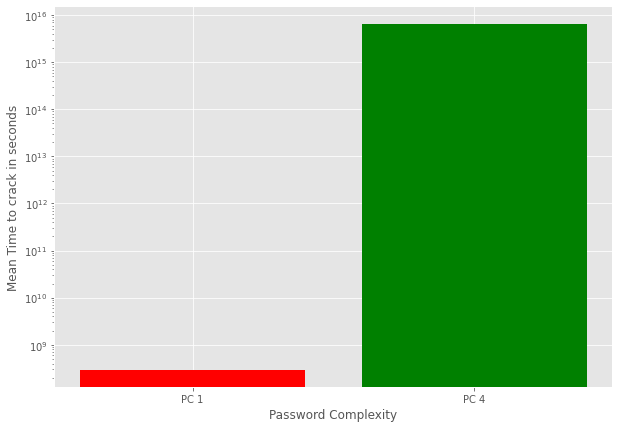

In [60]:
x = ["PC 1", "PC 4"]
y = [pwd_Complex1, pwd_Complex4]
plt.figure(figsize=(10, 7))
plt.bar(x, y, color=['red', 'green'])

plt.xlabel('Password Complexity')
plt.ylabel('Mean Time to crack in seconds')

# Have to log otherwise PC1 is not shown
plt.yscale("log")

**Comparing password complexity vs time to crack of each country**

-------

<p><a name="strongpwdele"></a></p>

## Comparing the elements that make a strong password using boxplot

**Taking the log of password crack by seconds column to use for boxplot**

In [61]:
pw["Log_of_TTCIS"] = np.log(pw["Time_to_crack_in_seconds"]+1)

In [62]:
pw

,country_code,country,Rank,Password,User_count,Global_rank,time,Time_to_crack_in_seconds,Password_Length,Continent,Has_Upper,Has_Lower,Has_Num,Has_Special_Char,Has_len_Over12,Password_Complexity,Log_of_TTCIS
0,au,Australia,1,123456,308483,1.0,0.19 MILLISECONDS,0.0,6,Oceania Australia,False,False,True,False,False,1,0.000000
49,au,Australia,2,password,191880,5.0,0.19 MILLISECONDS,0.0,8,Oceania Australia,False,True,False,False,False,1,0.000000
98,au,Australia,3,lizottes,98220,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Oceania Australia,False,True,False,False,False,1,9.413608
99,au,Australia,4,password1,86884,16.0,0.19 MILLISECONDS,0.0,9,Oceania Australia,False,True,True,False,False,2,0.000000
138,au,Australia,5,123456789,75856,2.0,0.19 MILLISECONDS,0.0,9,Oceania Australia,False,False,True,False,False,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia,False,True,False,False,False,1,9.413608
9796,vn,Vietnam,197,anhtien,2628,NaN,7 MINUTES 51 SECONDS 28 JIFFIES 1.29 MILLISECONDS,471.0,7,Asia,False,True,False,False,False,1,6.156979
9797,vn,Vietnam,198,lanhuong,2620,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia,False,True,False,False,False,1,9.413608
9798,vn,Vietnam,199,congacon,2584,NaN,3 HOURS 24 MINUTES 13 SECONDS 31 JIFFIES 4 MIL...,12253.0,8,Asia,False,True,False,False,False,1,9.413608


<AxesSubplot:>

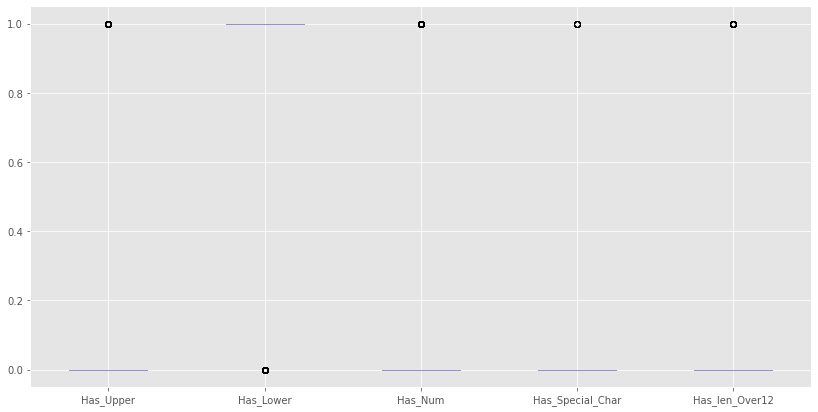

In [63]:
plt.figure(figsize = (14,7))
pw.boxplot(column=['Has_Upper', 'Has_Lower', 'Has_Num', "Has_Special_Char", "Has_len_Over12"]) 

---------- ******** ----------<br>
Has Uppercase Characters<br>
---------- ******** ----------

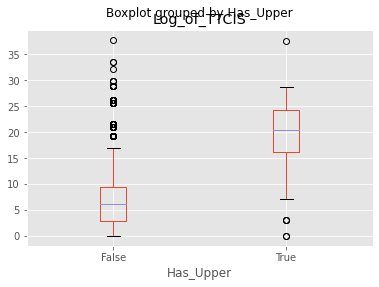

In [64]:
bp_Up = pw.boxplot(['Log_of_TTCIS'], by="Has_Upper")

---------- ******** ----------<br>
Has Lowercase Characters<br>
---------- ******** ----------

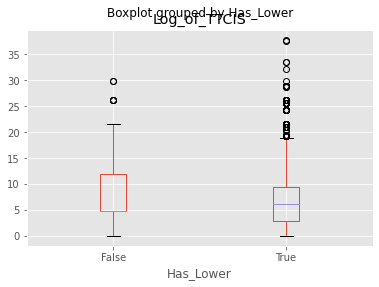

In [65]:
bp_Low = pw.boxplot(['Log_of_TTCIS'], by="Has_Lower")

---------- ******** ----------<br>
Has Numbers <br>
---------- ******** ----------

<AxesSubplot:title={'center':'Log_of_TTCIS'}, xlabel='Has_Num'>

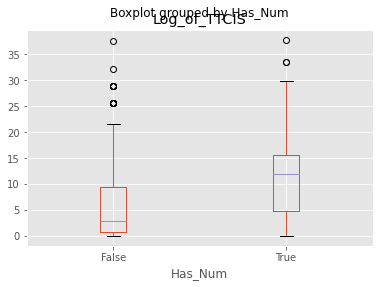

In [66]:
pw.boxplot(['Log_of_TTCIS'], by='Has_Num')

---------- ******** ----------<br>
Has Special Characters<br>
---------- ******** ----------

<AxesSubplot:title={'center':'Log_of_TTCIS'}, xlabel='Has_Special_Char'>

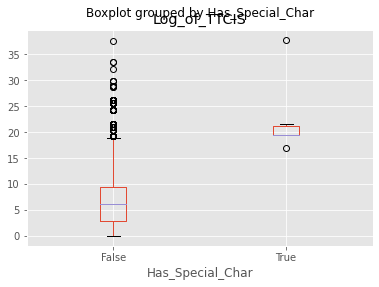

In [67]:
pw.boxplot(['Log_of_TTCIS'], by="Has_Special_Char")

---------- ******** ----------<br>
Has Password Length Over 12 <br>
---------- ******** ----------

<AxesSubplot:title={'center':'Log_of_TTCIS'}, xlabel='Has_len_Over12'>

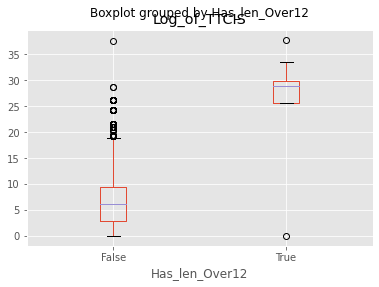

In [68]:
pw.boxplot(['Log_of_TTCIS'], by="Has_len_Over12")

**Plotting Password Complexity vs Time to Crack in Seconds by Country**

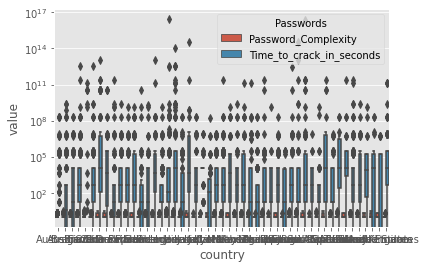

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dd=pd.melt(pw,id_vars=['country'],value_vars=['Password_Complexity','Time_to_crack_in_seconds'],var_name='Passwords')
sns.boxplot(x='country',y='value',data=dd,hue='Passwords')
plt.yscale("log")

<AxesSubplot:title={'center':'Password_Complexity'}, xlabel='Time_to_crack_in_seconds'>

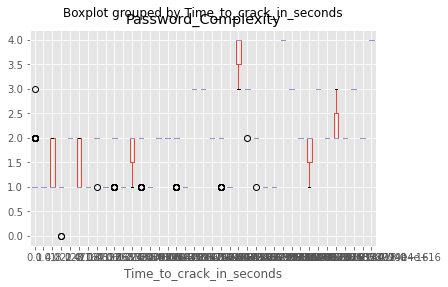

In [70]:
pw.boxplot('Password_Complexity', by='Time_to_crack_in_seconds')


<p><a name="onecomplextype"></a></p>

## Of the unique passwords, what percentage has only one complexity type

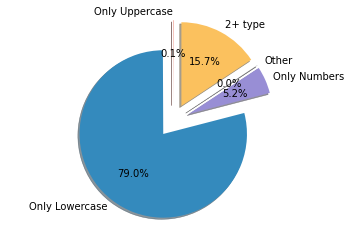

In [71]:
# Pie chart of unique passwords by character type
two_type = len(pw) - (len_onlyUpPwd+ len_onlyLowPwd+ len_onlyNumPwd+ len_onlySpePwd + len_otherPwd)

pie_chart_arr = np.array([len_onlyUpPwd, len_onlyLowPwd, len_onlyNumPwd, len_otherPwd, two_type])
#pie_chart_arr = np.array([5, 6872, 1295, 2, 2921])
pie_chart_label = ["Only Uppercase", "Only Lowercase", "Only Numbers", "Other", "2+ type"]
explode = (0.2, 0.2, 0.2, 0.2, 0.2)

fig1, ax1 = plt.subplots()
ax1.pie(pie_chart_arr, explode=explode, labels = pie_chart_label, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [72]:
onlyLowPwd["Time_to_crack_in_seconds"].describe()

count    3.360000e+03
mean     1.565599e+07
std      1.795425e+08
min      0.000000e+00
25%      1.000000e+00
50%      1.800000e+01
75%      1.225300e+04
max      2.443417e+09
Name: Time_to_crack_in_seconds, dtype: float64

In [73]:
(~pw["Has_Upper"]).values.sum()

4185

In [74]:
pw["Has_Upper"].values.sum()

70

In [75]:
pw["Has_Lower"].values.sum()

4025

<p><a name="TTCISbyyear"></a></p>

## Of the unique passwords in the list, has the crack time changed from the past years? [do passwords get easier to crack over time?]

---------- ******** ----------<br>
Year: 2020<br>
---------- ******** ----------

In [76]:
# mean TTIS for year 2020
df20_mean_TTIS = pw["Time_to_crack_in_seconds"].mean()
df20_mean_TTIS

11495940698502.844

---------- ******** ----------<br>
Year: 2019<br>
---------- ******** ----------

In [77]:
#CSV of the year 2019
p19 = pd.read_csv('U_password_crack_time_2019.csv')
p19

,Unnamed: 0,password,time,year,Time_to_crack_in_seconds
0,0,123456,0.20 MILLISECONDS,2019,0.0
1,1,password,0.20 MILLISECONDS,2019,0.0
2,2,lizottes,3 HOURS 37 MINUTES 2 SECONDS 3 JIFFIES 8 MILLI...,2019,13022.0
3,3,password1,0.20 MILLISECONDS,2019,0.0
4,4,123456789,0.20 MILLISECONDS,2019,0.0
...,...,...,...,...,...
4250,4250,hongngoc,3 HOURS 37 MINUTES 2 SECONDS 3 JIFFIES 8 MILLI...,2019,13022.0
4251,4251,anhtien,8 MINUTES 21 SECONDS 85 JIFFIES 7 MILLISECONDS,2019,501.0
4252,4252,lanhuong,3 HOURS 37 MINUTES 2 SECONDS 3 JIFFIES 8 MILLI...,2019,13022.0
4253,4253,congacon,3 HOURS 37 MINUTES 2 SECONDS 3 JIFFIES 8 MILLI...,2019,13022.0


In [78]:
# mean time to crack for year 2019
df19_mean_TTIS = p19["Time_to_crack_in_seconds"].mean()
df19_mean_TTIS

12217198473964.408

---------- ******** ----------<br>
Year: 2018<br>
---------- ******** ----------

In [79]:
#CSV of the year 2018
p18 = pd.read_csv('U_password_crack_time_2018.csv')
p18

,Unnamed: 0,password,time,year,Time_to_crack_in_seconds
0,0,123456,0.22 MILLISECONDS,2018,0.0
1,1,password,0.22 MILLISECONDS,2018,0.0
2,2,lizottes,3 HOURS 51 MINUTES 15 SECONDS 77 JIFFIES 9 MIL...,2018,13875.0
3,3,password1,0.22 MILLISECONDS,2018,0.0
4,4,123456789,0.22 MILLISECONDS,2018,0.0
...,...,...,...,...,...
4250,4250,hongngoc,3 HOURS 51 MINUTES 15 SECONDS 77 JIFFIES 9 MIL...,2018,13875.0
4251,4251,anhtien,8 MINUTES 54 SECONDS 64 JIFFIES 5 MILLISECONDS,2018,534.0
4252,4252,lanhuong,3 HOURS 51 MINUTES 15 SECONDS 77 JIFFIES 9 MIL...,2018,13875.0
4253,4253,congacon,3 HOURS 51 MINUTES 15 SECONDS 77 JIFFIES 9 MIL...,2018,13875.0


In [80]:
# mean time to crack for year 2018
df18_mean_TTIS = p18["Time_to_crack_in_seconds"].mean()
df18_mean_TTIS

13017196257847.102

---------- ******** ----------<br>
Year: 2017<br>
---------- ******** ----------

In [81]:
# CSV for year 2017
p17 = pd.read_csv('U_password_crack_time_2017.csv')
p17

,Unnamed: 0,password,time,year,Time_to_crack_in_seconds
0,0,123456,0.23 MILLISECONDS,2017,0.0
1,1,password,0.23 MILLISECONDS,2017,0.0
2,2,lizottes,4 HOURS 7 MINUTES 5 SECONDS 50 JIFFIES 1.15 MI...,2017,14825.0
3,3,password1,0.23 MILLISECONDS,2017,0.0
4,4,123456789,0.23 MILLISECONDS,2017,0.0
...,...,...,...,...,...
4250,4250,hongngoc,4 HOURS 7 MINUTES 5 SECONDS 50 JIFFIES 1.15 MI...,2017,14825.0
4251,4251,anhtien,9 MINUTES 30 SECONDS 17 JIFFIES 3 MILLISECONDS,2017,570.0
4252,4252,lanhuong,4 HOURS 7 MINUTES 5 SECONDS 50 JIFFIES 1.15 MI...,2017,14825.0
4253,4253,congacon,4 HOURS 7 MINUTES 5 SECONDS 50 JIFFIES 1.15 MI...,2017,14825.0


In [82]:
# mean time to crack for year 2017
df17_mean_TTIS = p17["Time_to_crack_in_seconds"].mean()
df17_mean_TTIS

13908280833311.486

---------- ******** ----------<br>
Year: 2016<br>
---------- ******** ----------

In [83]:
# CSV for year 2016
p16 = pd.read_csv('U_password_crack_time_2016.csv')
p16

,Unnamed: 0,password,time,year,Time_to_crack_in_seconds
0,0,123456,0.25 MILLISECONDS,2016,0.0
1,1,password,0.25 MILLISECONDS,2016,0.0
2,2,lizottes,4 HOURS 24 MINUTES 47 SECONDS 84 JIFFIES 3 MIL...,2016,15887.0
3,3,password1,0.25 MILLISECONDS,2016,0.0
4,4,123456789,0.25 MILLISECONDS,2016,0.0
...,...,...,...,...,...
4250,4250,hongngoc,4 HOURS 24 MINUTES 47 SECONDS 84 JIFFIES 3 MIL...,2016,15887.0
4251,4251,anhtien,10 MINUTES 11 SECONDS 3 JIFFIES 2 MILLISECONDS,2016,611.0
4252,4252,lanhuong,4 HOURS 24 MINUTES 47 SECONDS 84 JIFFIES 3 MIL...,2016,15887.0
4253,4253,congacon,4 HOURS 24 MINUTES 47 SECONDS 84 JIFFIES 3 MIL...,2016,15887.0


In [84]:
# mean time to crack for year 2016
df16_mean_TTIS = p16["Time_to_crack_in_seconds"].mean()
df16_mean_TTIS

14905106747783.549

---------- ******** ----------<br>
Year: 2015<br>
---------- ******** ----------

In [85]:
# CSV for year 2015
p15 = pd.read_csv('U_password_crack_time_2015.csv')
p15

,Unnamed: 0,password,time,year,Time_to_crack_in_seconds
0,0,123456,0.29 MILLISECONDS,2015,0.0
1,1,password,0.29 MILLISECONDS,2015,0.0
2,2,lizottes,5 HOURS 6 MINUTES 48 SECONDS 59 JIFFIES 9 MILL...,2015,18408.0
3,3,password1,0.29 MILLISECONDS,2015,0.0
4,4,123456789,0.29 MILLISECONDS,2015,0.0
...,...,...,...,...,...
4250,4250,hongngoc,5 HOURS 6 MINUTES 48 SECONDS 59 JIFFIES 9 MILL...,2015,18408.0
4251,4251,anhtien,11 MINUTES 48 SECONDS 98 JIFFIES 4 MILLISECONDS,2015,708.0
4252,4252,lanhuong,5 HOURS 6 MINUTES 48 SECONDS 59 JIFFIES 9 MILL...,2015,18408.0
4253,4253,congacon,5 HOURS 6 MINUTES 48 SECONDS 59 JIFFIES 9 MILL...,2015,18408.0


In [86]:
# mean time to crack for year 2015
df15_mean_TTIS = p15["Time_to_crack_in_seconds"].mean()
df15_mean_TTIS

17270097662984.64

**Plotting Average Crack Time for the Password Set Over Past 5 Years**

Seems to be getting faster to crack the password every year

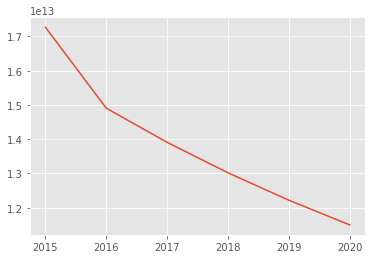

In [87]:
#Plotting to see TTIS trend over time
x = [2015,2016,2017,2018,2019,2020]
y =[df15_mean_TTIS, df16_mean_TTIS, df17_mean_TTIS, df18_mean_TTIS, df19_mean_TTIS, df20_mean_TTIS]
plt.plot(x,y)

In [88]:
#Percentage change from 2015 to 2020
percent_15to20 = ((df20_mean_TTIS - df15_mean_TTIS) / df20_mean_TTIS) * 100
percent_15to20

-50.22779010363011

# Are there same passwords from last year's list in this year's?

# Is there a change in average length of password by years?

In [89]:
pwd2019 = pd.read_csv("2019 - 200 passwords.csv")
pwd2019

,Password,Count
0,12345,2812220
1,123456,2485216
2,123456789,1052268
3,test1,993756
4,password,830846
...,...,...
195,123456789,29110
196,a123456,29103
197,samsung,29073
198,123,29068


In [90]:
#create a new column for password length
pwd2019["Password_Length"] = pwd2019["Password"].apply(len)
pwd2019

,Password,Count,Password_Length
0,12345,2812220,5
1,123456,2485216,6
2,123456789,1052268,9
3,test1,993756,5
4,password,830846,8
...,...,...,...
195,123456789,29110,9
196,a123456,29103,7
197,samsung,29073,7
198,123,29068,3


In [91]:
pwd2019["Password_Length"].mean()

6.935

**Only US info**

In [92]:
# table of just US rows
US_df = pw.loc[pw["country"] == "United States"]
US_df.to_csv("US_df.csv")

In [93]:
us = pd.read_csv("US_df.csv")

# conclusion

It would have been really nice to have been able to analyze the data and see if there is a correlation between length of the string and the time takes to crack 